In [38]:
from google.colab import files
import pandas as pd
upload=files.upload()
my_file=pd.read_csv("BostonHousing.csv")


Saving BostonHousing.csv to BostonHousing (3).csv


In [39]:
df=pd.DataFrame(my_file)
print(df)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [40]:
df.fillna(df.mean(),inplace=True)

In [41]:
#defining both data and target
X=df.drop('medv',axis=1)
Y=df['medv']


In [42]:
#features
print(X.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')


In [43]:
#target
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
df.isna().sum()

In [45]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
reg=model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
error=y_pred-Y_test
print(error)



173     5.381419
274     3.614232
491     1.224309
72      2.222936
452     2.670774
         ...    
412   -18.057994
436     4.083250
411    -1.024627
86     -0.239753
75      3.073668
Name: medv, Length: 102, dtype: float64


In [49]:
#calculating error
#MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,Y_test)
print(mse)

24.404825188146287


In [50]:
import numpy as np
rmse=np.sqrt(mse)
print(rmse)

4.940124005340988


In [53]:
#R^2 error
Y_mean=np.mean(Y_test)
baseline_prediction=np.full_like(Y_test,Y_mean)

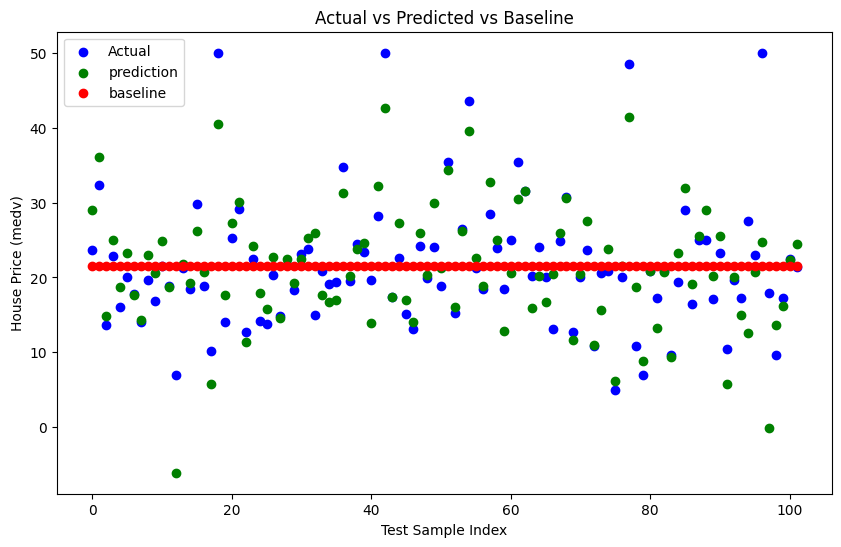

In [55]:
#plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(range(len(Y_test)),Y_test,color='blue',label='Actual')
plt.scatter(range(len(Y_test)),y_pred,color='green',label='prediction')
plt.scatter(range(len(Y_test)),baseline_prediction,color='red',label='baseline')
plt.legend()
plt.xlabel('Test Sample Index')
plt.ylabel('House Price (medv)')
plt.title('Actual vs Predicted vs Baseline')
plt.show()
